NAME: SUPROBHO GUPTA

ROLL NUMBER: M22AI651

Importing Libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,GlobalAveragePooling2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
import os
import cv2

Setting Path

In [3]:
train_val_directory="/content/drive/MyDrive/Machine Learning Datasets/charts/train_val"
test_directory="/content/drive/MyDrive/Machine Learning Datasets/charts/test"
train_path_labels="/content/train_val.csv"
train_val_labels=pd.read_csv(train_path_labels)



Loading the dataset- Training

In [4]:
imge=[]
lbl=[]
for filename in os.listdir(train_val_directory):
  img=cv2.imread(os.path.join(train_val_directory,filename))
  img=cv2.resize(img,(128,128))
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img_array=np.array(img)
  imge.append(img_array)
  lbl.append(filename)

le=LabelEncoder()
labels=le.fit_transform(lbl)
images=np.array(imge)
labels=np.array(lbl)
np.save('x_train.npy',images)
np.save('y_train.npy',labels)
x_train=np.load('x_train.npy')
y_train=np.load('y_train.npy')
x_train.shape


(1000, 128, 128, 3)

Loading the dataset- Validation

In [5]:
imge=[]
lbl=[]
for filename in os.listdir(test_directory):
  img=cv2.imread(os.path.join(test_directory,filename))
  img=cv2.resize(img,(128,128))
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img_array=np.array(img)
  imge.append(img_array)
  lbl.append(filename)

le=LabelEncoder()
labels=le.fit_transform(labels)
images=np.array(imge)
labels=np.array(lbl)
np.save('x_test.npy',images)
np.save('y_test.npy',labels)
x_test=np.load('x_test.npy')
y_test=np.load('y_test.npy')
x_test.shape

(50, 128, 128, 3)

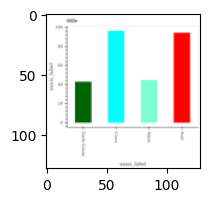

In [6]:
plt.figure(figsize=(10,2))
plt.imshow(x_train[10])


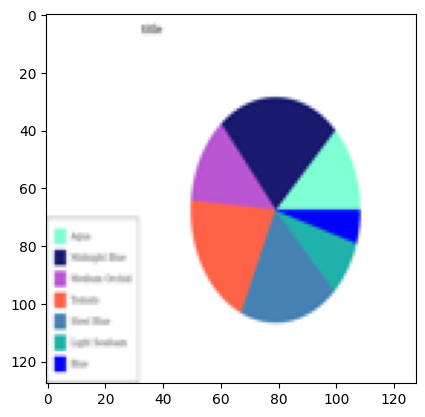

In [7]:
plt.imshow(x_test[10])

Giving labels to the images in dataset .Labels are fetched from csv file)

In [8]:
class_image=['line','dot_line','hbar_categorical','vbar_categorical','pie']


label_map={'line':0,'dot_line':1,'hbar_categorical':2,'vbar_categorical':3,'pie':4}
y_train=np.array([label_map[label] for label in train_val_labels['type']])


In [9]:
def image_sample(x,y,index):
  plt.figure(figsize=(10,2))
  plt.imshow(x[index])
  plt.xlabel(class_image[y[index]])



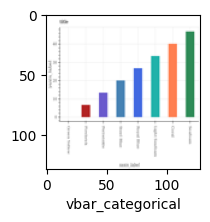

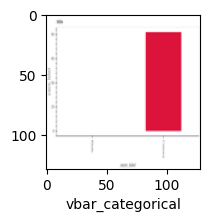

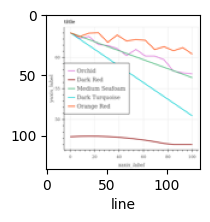

In [10]:
image_sample(x_train,y_train,0)
image_sample(x_train,y_train,188)
image_sample(x_train,y_train,507)


Normalizing the dataset

In [11]:
x_train=x_train/255
x_test=x_test/255


In [12]:
y_train_index=train_val_labels['image_index']
y_train_type=train_val_labels['type']


creating simple neural network

In [13]:
model=Sequential([Flatten(input_shape=(128,128,3)),
                  Dense(3000,activation='relu'),
                  Dense(1000,activation='relu'),
                  Dense(5,activation='softmax')
                  ])
model.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)


Epoch 1/10
32/32 [==============================] - 6s 30ms/step - loss: 5.4405 - accuracy: 0.2320
Epoch 2/10
32/32 [==============================] - 1s 27ms/step - loss: 1.6168 - accuracy: 0.2300
Epoch 3/10
32/32 [==============================] - 1s 25ms/step - loss: 1.6064 - accuracy: 0.2390
Epoch 4/10
32/32 [==============================] - 1s 26ms/step - loss: 1.5939 - accuracy: 0.2690
Epoch 5/10
32/32 [==============================] - 1s 25ms/step - loss: 1.6023 - accuracy: 0.2870
Epoch 6/10
32/32 [==============================] - 1s 25ms/step - loss: 1.5901 - accuracy: 0.2790
Epoch 7/10
32/32 [==============================] - 1s 25ms/step - loss: 1.5824 - accuracy: 0.2880
Epoch 8/10
32/32 [==============================] - 1s 25ms/step - loss: 1.5875 - accuracy: 0.2750
Epoch 9/10
32/32 [==============================] - 1s 26ms/step - loss: 1.5886 - accuracy: 0.2530
Epoch 10/10
32/32 [==============================] - 1s 29ms/step - loss: 1.5561 - accuracy: 0.3010


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2,random_state=42)


Evaluating on test data

In [15]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 8ms/step - loss: 1.5477 - accuracy: 0.2300


[1.5477229356765747, 0.23000000417232513]

In [16]:
y_predicted=model.predict(x_test)
y_predicted

7/7 [==============================] - 0s 7ms/step


array([[0.21109667, 0.25127897, 0.17771229, 0.2144799 , 0.14543219],
       [0.20610528, 0.24440263, 0.19737092, 0.18402693, 0.16809428],
       [0.20994957, 0.2127904 , 0.21983707, 0.14197116, 0.21545182],
       [0.2036142 , 0.2382462 , 0.20834456, 0.17329083, 0.17650421],
       [0.20381653, 0.2400848 , 0.20901856, 0.18139479, 0.16568527],
       [0.2090749 , 0.23852278, 0.19478892, 0.16977665, 0.1878368 ],
       [0.20881635, 0.22361426, 0.1989407 , 0.1580491 , 0.21057962],
       [0.2105175 , 0.2518646 , 0.1794825 , 0.21193759, 0.14619777],
       [0.21118125, 0.25213704, 0.17722584, 0.21472645, 0.14472947],
       [0.21480028, 0.2665821 , 0.15526055, 0.23805027, 0.12530683],
       [0.20581435, 0.2403792 , 0.20406052, 0.17721844, 0.1725275 ],
       [0.21410003, 0.276432  , 0.15156256, 0.23707962, 0.12082578],
       [0.20874263, 0.23843072, 0.18859144, 0.17370409, 0.19053112],
       [0.21074706, 0.25202924, 0.17868125, 0.21288535, 0.14565709],
       [0.21001482, 0.24873129, 0.

In [17]:
y_predicted_classes=[np.argmax(ele) for ele in y_predicted]

Modifying the model to CNN

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1.6220 - accuracy: 0.1587 - val_loss: 2.6853 - val_accuracy: 0.1850
Epoch 2/100
1/1 [==============================] - 0s 343ms/step - loss: 2.4384 - accuracy: 0.2037 - val_loss: 1.8002 - val_accuracy: 0.1900
Epoch 3/100
1/1 [==============================] - 0s 264ms/step - loss: 1.7694 - accuracy: 0.2025 - val_loss: 1.6416 - val_accuracy: 0.3700
Epoch 4/100
1/1 [==============================] - 0s 278ms/step - loss: 1.6877 - accuracy: 0.3300 - val_loss: 1.5890 - val_accuracy: 0.2400
Epoch 5/100
1/1 [==============================] - 0s 256ms/step - loss: 1.6296 - accuracy: 0.1900 - val_loss: 1.5474 - val_accuracy: 0.2400
Epoch 6/100
1/1 [==============================] - 0s 292ms/step - loss: 1.5710 - accuracy: 0.1900 - val_loss: 1.5255 - val_accuracy: 0.2450
Epoch 7/100
1/1 [==============================] - 0s 262ms/step - loss: 1.5346 - accuracy: 0.1963 - val_loss: 1.5029 - val_accuracy: 0.3800
Epoch 8/100
1/1 

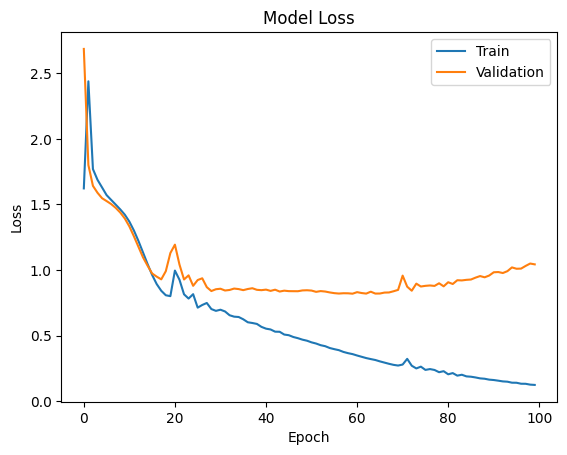

In [19]:
cnn_model=Sequential([Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)),
                      MaxPooling2D(pool_size=(2,2)),
                      Conv2D(32,(3,3),activation='relu'),
                      MaxPooling2D(pool_size=(2,2)),
                      Conv2D(64,(3,3),activation='relu'),
                      MaxPooling2D(pool_size=(2,2)),
                      Flatten(),
                      Dense(128,activation='relu'),
                      Dense(5,activation='softmax')
                      ])

cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=cnn_model.fit(x_train,y_train,batch_size=1000,epochs=100,validation_data=(x_test,y_test))



plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

In [20]:
cnn_model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 22ms/step - loss: 1.0431 - accuracy: 0.7600


[1.0431249141693115, 0.7599999904632568]

In [21]:
y_predicted=cnn_model.predict(x_test)
y_predicted[:5]

7/7 [==============================] - 0s 5ms/step


array([[6.2565649e-01, 1.8550304e-01, 1.5129626e-02, 6.3005915e-05,
        1.7364790e-01],
       [1.2042123e-04, 6.0039143e-05, 3.1900964e-07, 8.6727056e-07,
        9.9981838e-01],
       [4.6340120e-04, 3.6770357e-03, 7.3879182e-06, 1.8768186e-06,
        9.9585032e-01],
       [2.2074567e-02, 6.2706685e-01, 3.8094906e-05, 3.6172646e-06,
        3.5081694e-01],
       [4.8797239e-05, 1.4507813e-06, 9.9994528e-01, 2.0920467e-07,
        4.1189264e-06]], dtype=float32)

In [22]:
y_classes=[np.argmax(element) for element in y_predicted]
y_classes[:5]

[0, 4, 4, 1, 2]

Observations

In [23]:
print('classification_report',classification_report(y_test,y_classes))

classification_report               precision    recall  f1-score   support

           0       0.62      0.76      0.68        37
           1       0.77      0.61      0.68        44
           2       0.91      0.81      0.86        48
           3       0.94      0.94      0.94        33
           4       0.61      0.71      0.66        38

    accuracy                           0.76       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.77      0.76      0.76       200



In [24]:
confusion_matrix=confusion_matrix(y_test,y_classes)
print(confusion_matrix)

[[28  2  2  0  5]
 [ 6 27  0  0 11]
 [ 6  0 39  2  1]
 [ 0  0  2 31  0]
 [ 5  6  0  0 27]]


Text(95.72222222222221, 0.5, 'Actual')

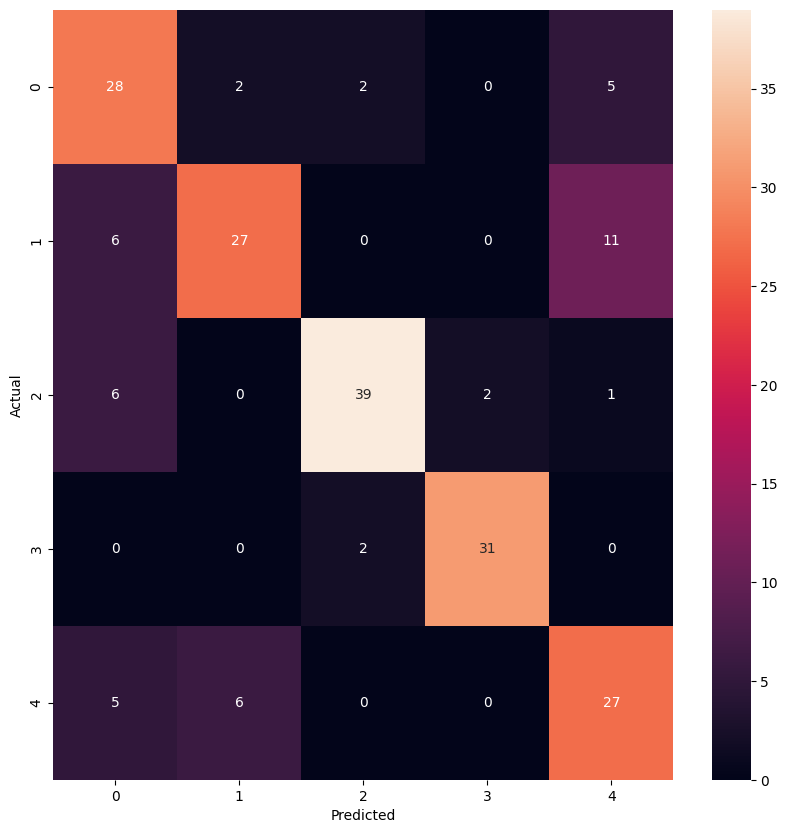

In [26]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Using VGG16 to finetune or model

In [27]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
model_vgg16=VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))


x=model_vgg16.output
x=GlobalAveragePooling2D()(x)
x=Dense(128,activation='relu')(x)
predictions=Dense(5,activation='softmax')(x)
finetune_model=tf.keras.Model(inputs=model_vgg16.input,outputs=predictions)

58889256/58889256 [==============================] - 3s 0us/step


Making the layers non trainable except classiication layer

In [28]:
for layer in finetune_model.layers:
  layer.trainable=False
  

In [29]:
finetune_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')


In [30]:
finetune_model.summary(0)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Evaluation on Training data

In [31]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

datagen.fit(x_train)

model.fit(datagen.flow(x_train, y_train, batch_size=32,
         subset='training'),
         validation_data=datagen.flow(x_train, y_train,
         batch_size=8, subset='validation'),
         steps_per_epoch=len(x_train) / 32, epochs=16)

Epoch 1/16
20/25 [=======================>......] - ETA: 0s - loss: 2.3944 - accuracy: 0.4250

25/25 [==============================] - 3s 124ms/step - loss: 2.3944 - accuracy: 0.4250 - val_loss: 0.9685 - val_accuracy: 0.6125


Evaluation on Testing data

In [32]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(x_test)
# fits the model on batches with real-time data augmentation:
model.fit(datagen.flow(x_test, y_test, batch_size=32,
         subset='validation'),
         validation_data=datagen.flow(x_test, y_test,
         batch_size=8, subset='validation'),
         steps_per_epoch=len(x_test) / 32, epochs=5)

Epoch 1/5
2/6 [========>.....................] - ETA: 0s - loss: 1.0430 - accuracy: 0.5250

6/6 [==============================] - 2s 199ms/step - loss: 1.0430 - accuracy: 0.5250 - val_loss: 0.8935 - val_accuracy: 0.6500
